Image to be tested...

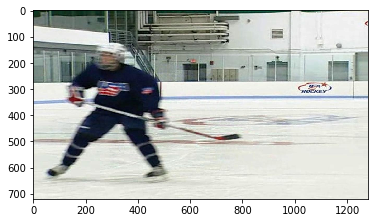

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
%matplotlib inline
import pylab as plt

img_num = 885;
test_image = 'testing/sample_image/hockey1/' + str(img_num).zfill(3) + '.jpg'

oriImg = cv.imread(test_image) # B,G,R order
f = plt.imshow(oriImg[:,:,[2,1,0]]) # reorder it before displaying

Retrieve the ground truth annotations...

In [2]:
import h5py

ground_truth = h5py.File('testing/sample_image/hockey1/annot.h5', 'r')

filename = ground_truth['imgname'][img_num-1]
print(''.join(chr(int(i)) for i in filename))

parts_gt = ground_truth['part'][img_num-1]

885.jpg


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Create PoseModel object from the ground truth keypoints

In [3]:
import testing.python.predictor as predictor

## Match format
points_gt = np.array(parts_gt[[8,12,11,10,13,14,15,2,1,0,3,4,5]])
points_gt = np.insert(points_gt, 0, [[np.nan, np.nan]], axis=0)
nan_arr = np.repeat([[np.nan, np.nan]], 4, axis=0)
points_gt = np.concatenate([points_gt, nan_arr, [parts_gt[9]]])

## Create PoseModel
pose_model_gt = predictor.PoseModel(points_gt)

Visualize ground truth keypoints...

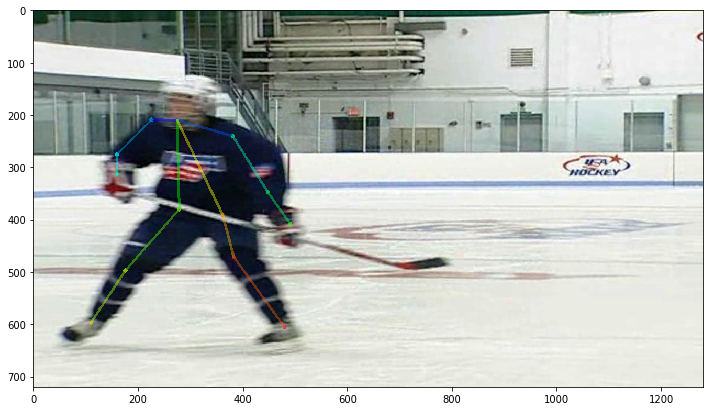

In [4]:
canvas = pose_model_gt.overLay(oriImg) # B,G,R order

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

Run openpose predictor and detect poses...

In [5]:
openpose_predict = predictor.OpenPosePredictor()
pose_models_detected = openpose_predict.getPoseModels(test_image)

print("{} poses detected!".format(len(pose_models_detected)))

2 poses detected!


Visualize the detected keypoints...

(nan, nan)


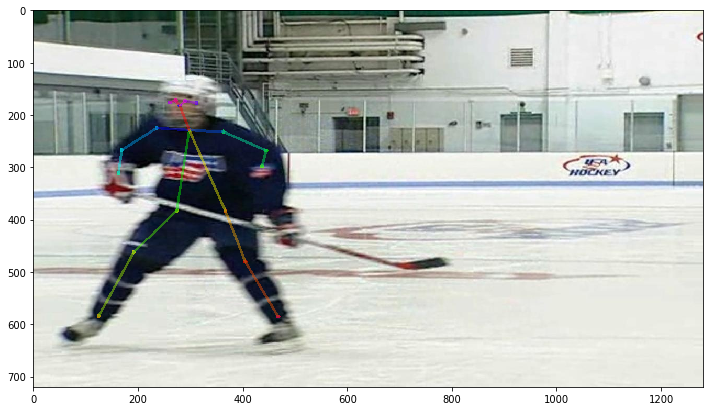

In [6]:
num=1
canvas = openpose_predict.drawPoseModels([0])
print(pose_models_detected[num].getPart(9))
to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)

Find the best model to use

In [8]:
max_score = 0
max_num_corr = 0
max_num_total = 0
for pose_model_dt in pose_models_detected:
    parts_found = predictor.computePCKh(pose_model_gt, pose_model_dt)
    if parts_found['found'] != 0 and parts_found['correct'] > max_score:
        max_score = parts_found['correct']
        max_num_corr = parts_found['correct']
        max_num_total = parts_found['found']

print("PCKh: {} ({}/{})".format(max_score, max_num_corr, max_num_total))

PCKh: 10 (10/13)


Load computed PCKh's